In [4]:
from __future__ import print_function

import tensorflow as tf
import numpy
import pandas as pd
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
excel_file = 'data.xlsx'
cf_file = pd.read_excel(excel_file)
df1 = cf_file[['f [mm]']]
df2 = cf_file[['Fc [N]']]
train_X =df1 #numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                  #      7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y =df2 #numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
          #               2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]  



In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.141050145 W= 0.10848082 b= 1.8166215
Epoch: 0100 cost= 0.133668855 W= 0.11687327 b= 1.7562469
Epoch: 0150 cost= 0.127138481 W= 0.124766886 b= 1.6994606
Epoch: 0200 cost= 0.121361129 W= 0.13219106 b= 1.6460516
Epoch: 0250 cost= 0.116249800 W= 0.13917387 b= 1.5958176
Epoch: 0300 cost= 0.111728057 W= 0.14574112 b= 1.548574
Epoch: 0350 cost= 0.107727766 W= 0.15191747 b= 1.5041416
Epoch: 0400 cost= 0.104188599 W= 0.15772651 b= 1.4623516
Epoch: 0450 cost= 0.101057418 W= 0.1631901 b= 1.4230468
Epoch: 0500 cost= 0.098287053 W= 0.16832894 b= 1.3860785
Epoch: 0550 cost= 0.095835976 W= 0.1731621 b= 1.3513088
Epoch: 0600 cost= 0.093667328 W= 0.17770801 b= 1.3186063
Epoch: 0650 cost= 0.091748632 W= 0.18198347 b= 1.2878491
Epoch: 0700 cost= 0.090050884 W= 0.18600483 b= 1.2589192
Epoch: 0750 cost= 0.088548817 W= 0.189787 b= 1.2317108
Epoch: 0800 cost= 0.087219901 W= 0.19334394 b= 1.2061229
Epoch: 0850 cost= 0.086044088 W= 0.19668913 b= 1.1820574
Epoch: 0900 cost= 0.085003681 W= 0.

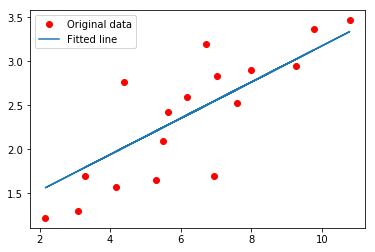

Testing... (Mean square loss Comparison)
Testing cost= 0.09483797
Absolute mean square loss difference: 0.011569403


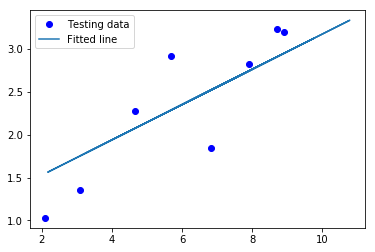

In [23]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
